In [110]:
import numpy as np
import pandas as pd
read_data = pd.read_excel(r"F:\git_project\spider_list\death_company\death_company_info - 副本.xls")
df_data = pd.DataFrame(read_data)
# 计算存活天数
def cal_live_time(start_time,end_time):
    import datetime
    d1 = datetime.datetime.strptime(start_time,'%Y-%m-%d')
    d2 = datetime.datetime.strptime(end_time,'%Y-%m-%d')
    days = (d2-d1).days
    return days

In [111]:
need_data = df_data.loc[:,['com_name','com_born','com_change_close_date','com_style','com_position','com_tags','com_fund_status_name','com_invsts','death_reason']]

In [112]:
need_data.head()

,com_name,com_born,com_change_close_date,com_style,com_position,com_tags,com_fund_status_name,com_invsts,death_reason
0,韦博英语,1996-03-01,2019-10-09,教育语言学习,上海,教育/语言学习/教育机构/英语学习/英语培训/外教/泛教育/,尚未获投,NaN,现金流断裂/
1,我厨生鲜,2014-12-01,2019-12-12,电子商务生鲜食品,上海,生鲜/垂直电商/O2O/B2B/B2C/美食社区/本地生活/美食餐饮/电子商务/生鲜食品/半...,B轮,集富亚洲JAFCO/LB投资(LB Investment)/新天域资本/谱润投资/远景万方/...,现金流断裂/行业竞争/
2,51tou,2014-06-01,2019-08-02,广告营销整合营销传播,上海,服务/广告营销/整合营销传播/大数据营销/精准营销/数字营销/整合营销/广告检测/,尚未获投,NaN,业务调整/
3,闲鱼懒猫,2017-11-01,2019-06-13,游戏游戏媒体及社区,上海,游戏/游戏媒体及社区/电子竞技/电竞赛事/游戏/电竞/,尚未获投,NaN,商业模式匮乏/行业竞争/
4,尚品网,2008-11-01,2019-07-31,电子商务奢侈品,北京,垂直电商/时尚潮品/闪购/电子商务/化妆品/珠宝首饰/会员制/消费升级/奢侈品/化妆品电商/...,C轮,晨兴资本/成为资本/思伟投资/蓝图创投/,现金流断裂/行业竞争/


In [113]:
# 计算所有公司的存活时间
f = lambda x:cal_live_time(x.com_born,x.com_change_close_date)
need_data['live_time'] = need_data.apply(f,axis=1)

In [114]:
need_data.head()

,com_name,com_born,com_change_close_date,com_style,com_position,com_tags,com_fund_status_name,com_invsts,death_reason,live_time
0,韦博英语,1996-03-01,2019-10-09,教育语言学习,上海,教育/语言学习/教育机构/英语学习/英语培训/外教/泛教育/,尚未获投,NaN,现金流断裂/,8622
1,我厨生鲜,2014-12-01,2019-12-12,电子商务生鲜食品,上海,生鲜/垂直电商/O2O/B2B/B2C/美食社区/本地生活/美食餐饮/电子商务/生鲜食品/半...,B轮,集富亚洲JAFCO/LB投资(LB Investment)/新天域资本/谱润投资/远景万方/...,现金流断裂/行业竞争/,1837
2,51tou,2014-06-01,2019-08-02,广告营销整合营销传播,上海,服务/广告营销/整合营销传播/大数据营销/精准营销/数字营销/整合营销/广告检测/,尚未获投,NaN,业务调整/,1888
3,闲鱼懒猫,2017-11-01,2019-06-13,游戏游戏媒体及社区,上海,游戏/游戏媒体及社区/电子竞技/电竞赛事/游戏/电竞/,尚未获投,NaN,商业模式匮乏/行业竞争/,589
4,尚品网,2008-11-01,2019-07-31,电子商务奢侈品,北京,垂直电商/时尚潮品/闪购/电子商务/化妆品/珠宝首饰/会员制/消费升级/奢侈品/化妆品电商/...,C轮,晨兴资本/成为资本/思伟投资/蓝图创投/,现金流断裂/行业竞争/,3924


In [115]:
# 获取生存时间最短的公司
need_data.loc[need_data['live_time'].idxmin(),:]

com_name                                                              第一医生
com_born                                                        2014-12-01
com_change_close_date                                           2015-04-01
com_style                                                         医疗健康寻医诊疗
com_position                                                            北京
com_tags                 挂号/诊所/腾讯系/医疗健康/医生服务/寻医诊疗/健康保健/互联网医疗/医疗机构/患者服务/医院/
com_fund_status_name                                                  尚未获投
com_invsts                                                             NaN
death_reason                                                       商业模式匮乏/
live_time                                                              121
Name: 5508, dtype: object

In [116]:
# 获取生存时间最长的公司
need_data.loc[need_data['live_time'].idxmax(),:]

com_name                                           韦博英语
com_born                                     1996-03-01
com_change_close_date                        2019-10-09
com_style                                        教育语言学习
com_position                                         上海
com_tags                 教育/语言学习/教育机构/英语学习/英语培训/外教/泛教育/
com_fund_status_name                               尚未获投
com_invsts                                          NaN
death_reason                                     现金流断裂/
live_time                                          8622
Name: 0, dtype: object

In [117]:
# 按照存活天数对数据排序
need_data.sort_values(by='live_time',ascending=False)[:20]

,com_name,com_born,com_change_close_date,com_style,com_position,com_tags,com_fund_status_name,com_invsts,death_reason,live_time
0,韦博英语,1996-03-01,2019-10-09,教育语言学习,上海,教育/语言学习/教育机构/英语学习/英语培训/外教/泛教育/,尚未获投,NaN,现金流断裂/,8622
29,浩沙健身,1997-08-01,2019-06-04,体育运动大众健身,北京,健身/体育运动/大众健身/体育/健身房/瑜伽 /水上项目/健身场馆/健身俱乐部/体育运动品牌/康/,尚未获投,NaN,NaN,7977
5725,中鳖科技,1995-11-01,2014-07-26,金融支付,浙江,移动支付/金融/支付/,尚未获投,NaN,NaN,6842
1707,VIP达人,2000-01-01,2017-08-11,本地生活商户服务及信息化,北京,分类信息/同城活动/本地生活/休闲娱乐/商户服务及信息化/其他生活服务/生活服务/,不明确,NaN,NaN,6432
1699,四海科技,2000-01-01,2017-08-11,广告营销移动及网络广告,北京,微信营销/外包/广告营销/移动及网络广告/数字营销/网络营销/,不明确,NaN,NaN,6432
1684,08投资论坛,2000-01-01,2017-08-11,金融其他金融,江苏,社会化投资/金融/金融媒体及社区/综合金融服务/,不明确,NaN,NaN,6432
5121,ArcNote商务相机,1998-08-01,2015-07-27,工具软件图像视频,浙江,会议会务/图片图像识别/拍照工具/工具软件/文件文档/图像视频/个人办公工具/,尚未获投,NaN,商业模式匮乏/业务调整/,6204
5518,虹软美妆秀,1998-08-01,2015-02-04,工具软件图像视频,浙江,拍照工具/工具软件/图像视频/图片/音视频/,不明确,NaN,业务调整/行业竞争/,6031
305,雕刻时光,2002-11-01,2019-03-21,本地生活美食餐饮,北京,本地生活/美食餐饮/酒水饮料/咖啡馆/咖啡品牌/咖啡/轻食/,尚未获投,NaN,NaN,5984
4961,马头流量,2000-01-01,2015-07-28,工具软件事项及效率,上海,流量/工具软件/安全软件/其他工具/事项及效率/安全隐私/杀毒软件/个人办公工具/,尚未获投,NaN,商业模式匮乏/,5687


In [118]:
# 平均存活时间
need_data['live_time'].mean()

1293.2704402515724

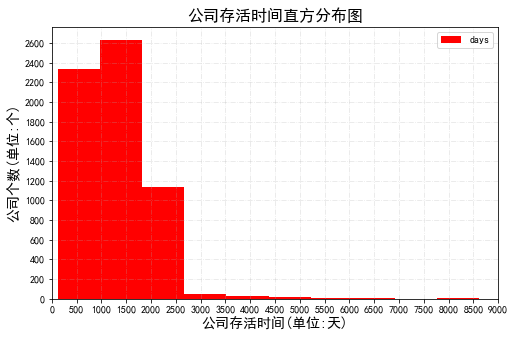

In [119]:
import matplotlib.pyplot as plt
from pylab import *
# 设置刻度间隔
from matplotlib.pyplot import MultipleLocator
plt.figure(num=3, figsize=(8, 5),)
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.hist(need_data['live_time'],color=['red'],label='days')
# 设置x，y轴的间隔
x_major_locator=MultipleLocator(500)
y_major_locator=MultipleLocator(200)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(0,9000)
plt.legend(loc='upper right')
plt.title("公司存活时间直方分布图",fontsize=16)
plt.xlabel('公司存活时间(单位:天)',fontsize=14)
plt.ylabel('公司个数(单位:个)',fontsize=14)
plt.savefig('.\可视化图表\com_live_time.jpg')
plt.grid(linestyle='-.', alpha=.3)
plt.show()

In [120]:
# 存活时间TOP20的公司位置统计
live_time_top_20 = need_data.sort_values(by='live_time',ascending=False)[:20]
live_time_top_20['com_position'].value_counts()

北京    10
上海     5
浙江     3
江苏     1
湖南     1
Name: com_position, dtype: int64

北京     2216
广东     1082
上海     1022
浙江      392
四川      278
江苏      252
福建      134
湖北      114
山东       83
陕西       76
重庆       68
河南       55
安徽       51
湖南       51
天津       46
辽宁       42
台湾       37
北美洲      23
香港       21
河北       20
云南       18
广西       18
黑龙江      17
贵州       14
江西       13
亚洲       10
山西        9
海南        9
吉林        7
内蒙古       6
欧洲        4
甘肃        4
新疆        3
西藏        2
宁夏        2
青海        1
北京        1
Name: com_position, dtype: int64


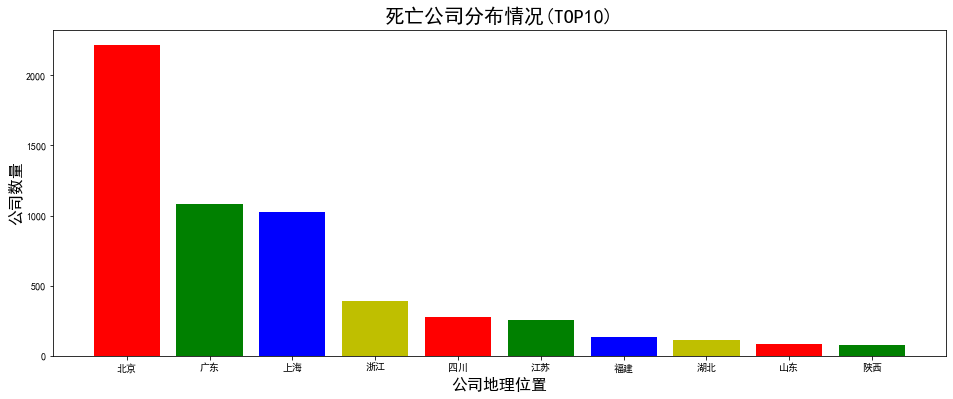

In [121]:
# 统计所有公司位置的总数
com_position = need_data['com_position'].value_counts()
print(com_position)
com_position = com_position.head(10)
name = np.array(list(com_position.index))
num = np.array(list(com_position.values))
plt.figure(figsize=(16,6))
plt.bar(name,num,color='rgby')
plt.title('死亡公司分布情况(TOP10)',fontsize=20)
plt.xlabel('公司地理位置',fontsize=16)
plt.ylabel('公司数量',fontsize=16)
plt.savefig('.\可视化图表\com_position.jpg')
plt.show()

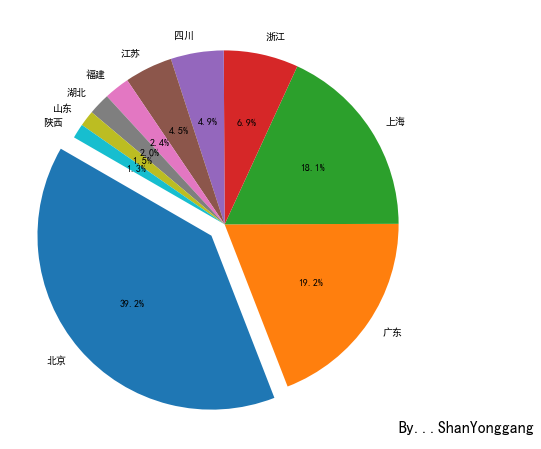

In [124]:
plt.figure(figsize=(20,8))
explode = [0.1,0,0,0,0,0,0,0,0,0]
plt.pie(num,labels=name,explode=explode,autopct='%1.1f%%',shadow=False,startangle=150)
plt.text(1,-1.2,'By...ShanYonggang',fontsize=16)
plt.savefig('.\可视化图表\com_position_pie.jpg')
plt.show()

不明确       3410
尚未获投      1783
天使轮        522
A轮         238
B轮          64
已被收购        53
种子轮         41
Pre-A轮      29
C轮          16
战略投资        16
A+轮         15
D轮           4
已上市          3
B+轮          3
E轮           2
新三板          2
Name: com_fund_status_name, dtype: int64


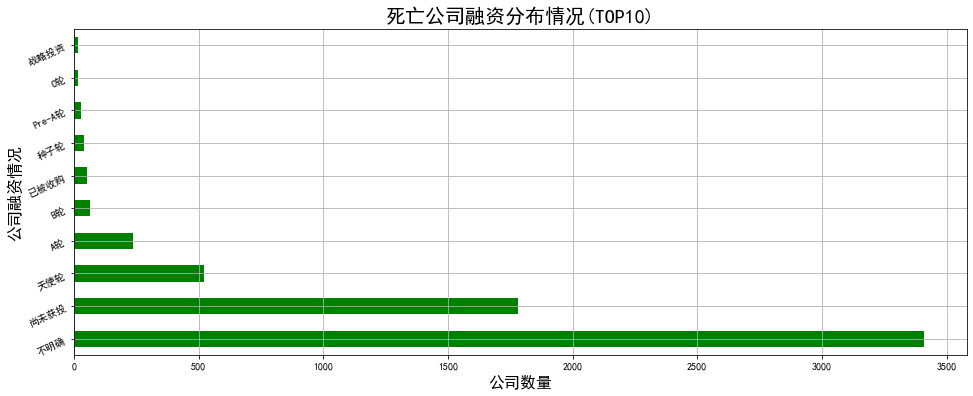

In [73]:
# 公司融资情况
com_financing = need_data['com_fund_status_name'].value_counts()
print(com_financing)
plt.figure(figsize=(16,6))
# plt.bar(index,num,color='rgby')
com_financing.head(10).plot(kind='barh',color='g',grid=True,rot=25)
plt.title('死亡公司融资分布情况(TOP10)',fontsize=20)
plt.xlabel('公司数量',fontsize=16)
plt.ylabel('公司融资情况',fontsize=16)
plt.savefig('.\可视化图表\com_financing.jpg')
plt.show()

In [127]:
need_data[need_data['com_fund_status_name'] == '已上市']

,com_name,com_born,com_change_close_date,com_style,com_position,com_tags,com_fund_status_name,com_invsts,death_reason,live_time
345,云猴,2013-12-01,2019-01-08,电子商务综合电商,湖南,B2C/大公司新产品/电子商务/综合电商/综合性电商/电商经营模式/综合B2C/批发零售/新零售/,已上市,NaN,业务过于分散/行业竞争/,1864
6024,快游智能加速器,2000-01-01,2013-07-25,工具软件事项及效率,上海,流量/工具软件/其他工具/系统工具/事项及效率/加速软件/个人办公工具/,已上市,NaN,商业模式匮乏/,4954
6122,联络短信,2007-01-01,2010-07-28,工具软件事项及效率,北京,工具软件/个人助理/事项及效率/日常应用/个人办公工具/,已上市,红杉资本中国/光速中国/东方富海/方广资本/英飞尼迪Infinity/元禾原点创投/,NaN,1304


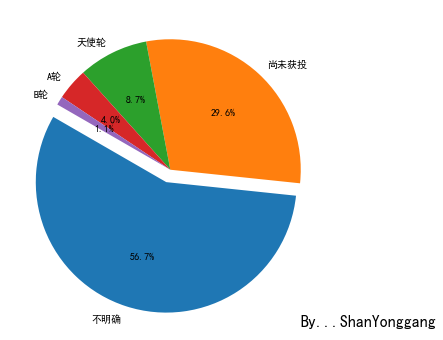

In [128]:
plt.figure(figsize=(14,6))
index = list(com_financing.head(5).index)
num = list(com_financing.head(5).values)
explode = [0.1,0,0,0,0]
plt.pie(num,labels=index,explode=explode,autopct='%1.1f%%',shadow=False,startangle=150)
plt.text(1,-1.2,'By...ShanYonggang',fontsize=16)
plt.savefig('.\可视化图表\com_financing_pie.jpg')
plt.show()

In [129]:
rf = lambda x : str(x).split('/')[:-1]
death_reason = need_data['death_reason'].apply(rf)
all_reason = death_reason.value_counts()[1:]
reason = list(all_reason.index)
count = list(all_reason.values)
reason_dic = {
    'death_reason':reason,
    'reason_counts':count
}
df = pd.DataFrame(reason_dic)
df

,death_reason,reason_counts
0,[商业模式匮乏],287
1,[行业竞争],138
2,[市场伪需求],111
3,[业务调整],89
4,"[市场伪需求, 商业模式匮乏]",58
...,...,...
144,"[市场伪需求, 商业模式匮乏, 政策监管, 法律法规风险]",1
145,"[团队能力不足, 行业竞争]",1
146,"[业务调整, 法律法规风险]",1
147,"[业务调整, 产品缺陷严重]",1


In [130]:
h = lambda x: ','.join(x)
df['death_reason'] = df['death_reason'].apply(h)

In [131]:
df

,death_reason,reason_counts
0,商业模式匮乏,287
1,行业竞争,138
2,市场伪需求,111
3,业务调整,89
4,"市场伪需求,商业模式匮乏",58
...,...,...
144,"市场伪需求,商业模式匮乏,政策监管,法律法规风险",1
145,"团队能力不足,行业竞争",1
146,"业务调整,法律法规风险",1
147,"业务调整,产品缺陷严重",1


In [132]:
# df['death_reason'].str.split(',',expand=True).stack().reset_index(level=1, drop=True).rename('tag'))

In [133]:
dff=df.drop('death_reason', axis=1).join(df['death_reason'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('death_reason'))

In [134]:
dff

,reason_counts,death_reason
0,287,商业模式匮乏
1,138,行业竞争
2,111,市场伪需求
3,89,业务调整
4,58,市场伪需求
...,...,...
146,1,法律法规风险
147,1,业务调整
147,1,产品缺陷严重
148,1,市场伪需求


In [135]:
death_reasons = dff.groupby(dff['death_reason']).sum()
death_reasons

,reason_counts
death_reason,
不重视客户,10
与投资人冲突,5
业务调整,140
业务过于分散,63
产品入场时机,112
产品缺陷严重,31
创始人问题,18
商业模式匮乏,468
团队缺乏激情,2


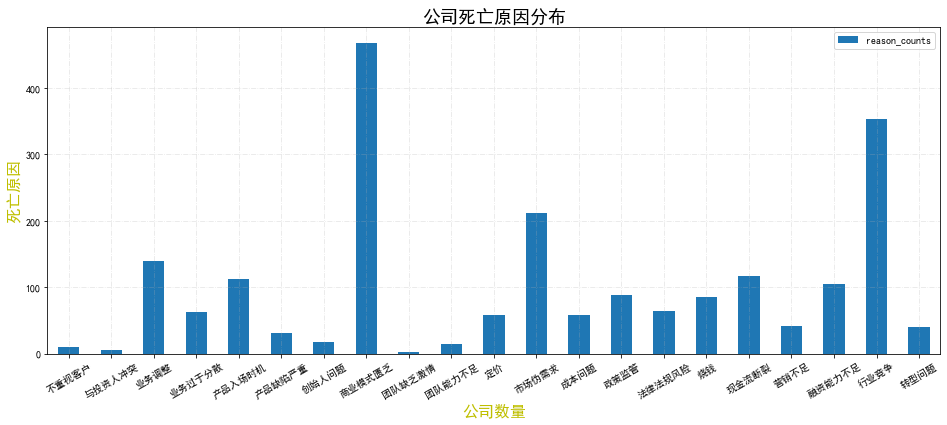

In [136]:
death_reasons.plot(kind='bar',figsize=(16,6),rot=30)
plt.title('公司死亡原因分布',fontsize=18)
plt.xlabel('公司数量',fontsize=16,color='y')
plt.ylabel('死亡原因',fontsize=16,color='y')
plt.grid(linestyle='-.', alpha=.3)
plt.savefig('.\可视化图表\com_death_reason.jpg')
plt.show()

In [137]:
reason_dic = pd.DataFrame(death_reasons).to_dict()['reason_counts']
reason_dic

{'不重视客户': 10,
 '与投资人冲突': 5,
 '业务调整': 140,
 '业务过于分散': 63,
 '产品入场时机': 112,
 '产品缺陷严重': 31,
 '创始人问题': 18,
 '商业模式匮乏': 468,
 '团队缺乏激情': 2,
 '团队能力不足': 14,
 '定价': 58,
 '市场伪需求': 211,
 '成本问题': 58,
 '政策监管': 88,
 '法律法规风险': 64,
 '烧钱': 85,
 '现金流断裂': 117,
 '营销不足': 42,
 '融资能力不足': 104,
 '行业竞争': 353,
 '转型问题': 40}

(-0.5, 1023.5, 909.5, -0.5)

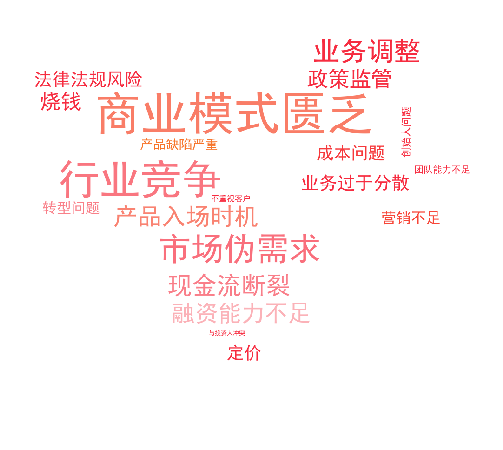

In [138]:
from wordcloud import WordCloud
from imageio import imread
from wordcloud import ImageColorGenerator

fontpath = 'simhei.ttf'
color_mask = imread("heart.jpg") #读取背景图片，
 
wc = WordCloud(font_path = fontpath,          #设置字体
               background_color = "white",    #背景颜色
               max_words = 1000,              #词云显示的最大词数
               max_font_size = 100,           #字体最大值
               min_font_size = 10,            #字体最小值
               random_state = 42,             #随机数
               collocations = False,          #避免重复单词
               mask = color_mask,                 #造型遮盖
               width = 140, height = 80,    #图像宽高，需配合plt.figure(dpi=xx)放缩才有效
               margin = 2                     #字间距
               )
word_frequence = dict(reason_dic)
cl = wc.generate_from_frequencies(word_frequence)
# plt.imshow(cl)
image_colors = ImageColorGenerator(color_mask)
plt.figure(dpi = 140)
plt.imshow(wc.recolor(color_func=image_colors)) # 重新上色
plt.axis('off')

游戏游戏开发商           238
电子商务综合电商          227
本地生活美食餐饮          160
金融借贷              149
企业服务行业信息化及解决方案    141
                 ... 
新工业化学工业             1
新工业新材料              1
农业农机农资及装备           1
房产服务房产开发            1
农业农业电商              1
Name: com_style, Length: 191, dtype: int64


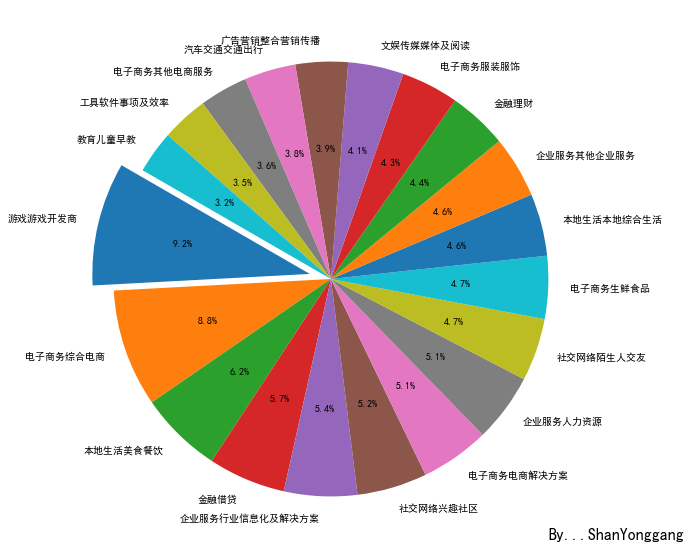

In [139]:
com_style = need_data['com_style'].value_counts()
print(com_style)
plt.figure(figsize=(16,10))
name = com_style[:20].index
num = com_style[:20].values
explode = [0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.pie(num,labels=name,explode=explode,autopct='%1.1f%%',shadow=False,startangle=150)
plt.text(1,-1.2,'By...ShanYonggang',fontsize=16)
plt.savefig('.\可视化图表\com_style_pie.jpg')
plt.show()

(-0.5, 499.5, 549.5, -0.5)

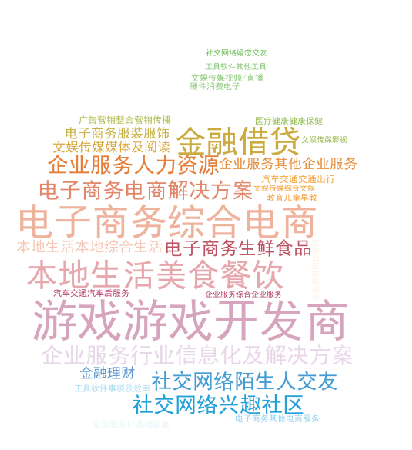

In [90]:
fontpath = 'simhei.ttf'
color_mask = imread("apple.jpg") #读取背景图片，
 
wc = WordCloud(font_path = fontpath,          #设置字体
               background_color = "white",    #背景颜色
               max_words = 1000,              #词云显示的最大词数
               max_font_size = 100,           #字体最大值
               min_font_size = 10,            #字体最小值
               random_state = 42,             #随机数
               collocations = False,          #避免重复单词
               mask = color_mask,                 #造型遮盖
               width = 140, height = 80,    #图像宽高，需配合plt.figure(dpi=xx)放缩才有效
               margin = 2                     #字间距
               )
word_frequence = dict(com_style)
cl = wc.generate_from_frequencies(word_frequence)
# plt.imshow(cl)
image_colors = ImageColorGenerator(color_mask)
plt.figure(dpi = 140)
plt.imshow(wc.recolor(color_func=image_colors)) # 重新上色
plt.axis('off')
# plt.savefig('./可视化图/标签图云.jpg')

In [146]:
need_data[need_data['com_style']=='金融借贷'].head(20)

,com_name,com_born,com_change_close_date,com_style,com_position,com_tags,com_fund_status_name,com_invsts,death_reason,live_time
15,麦子金服,2015-03-01,2019-11-25,金融借贷,上海,P2P借贷/P2B借贷/金融超市/财富管理/金融/理财/金融综合服务/借贷/资产管理/股权投...,B轮,海通开元/中缔资本/,政策监管/法律法规风险/,1730
18,拓道金服,2013-11-01,2019-11-24,金融借贷,浙江,P2P/小额贷款/消费金融/金融/汽车金融/借贷/中介/担保/抵押贷款/,A轮,蓝山中国资本/帮实资本/宏桥资本/,政策监管/法律法规风险/,2214
20,金信网,2013-12-01,2019-06-06,金融借贷,北京,P2P/金融/借贷/银行/,尚未获投,NaN,NaN,2013
21,名校贷,2013-12-01,2019-06-27,金融借贷,上海,P2P借贷/Fintech金融科技/平台/小额贷款/金融/信用及征信/借贷/信用贷款/借贷平台/,A轮,海通开元/,政策监管/法律法规风险/,2034
35,爱投资,2013-01-01,2019-06-14,金融借贷,北京,P2B借贷/百度系/新浪系/金融/借贷/借贷平台/企业融资/企业金融/担保/,战略投资,中援应急投资有限公司/伯藜创投/达泰资本/,NaN,2355
41,好友钱,2015-05-01,2019-06-01,金融借贷,北京,P2P借贷/匿名社交/金融/熟人社交/借贷/家庭熟人社交/理财平台/借贷平台/,天使轮,NaN,市场伪需求/政策监管/法律法规风险/,1492
42,金柚金服,2017-12-01,2019-06-01,金融借贷,浙江,P2P借贷/金融/借贷/,尚未获投,NaN,NaN,547
58,坚果理财,2015-11-01,2019-06-01,金融借贷,上海,P2P借贷/金融/借贷/理财平台/,尚未获投,NaN,NaN,1308
69,金盈所,2015-05-01,2019-06-01,金融借贷,北京,金融/借贷/,尚未获投,NaN,NaN,1492
76,光速借款,2017-03-01,2019-06-01,金融借贷,北京,Fintech金融科技/大数据/小额贷款/金融/信用及征信/借贷/信用贷款/小额信贷/金融大...,尚未获投,NaN,NaN,822


In [149]:
need_data[need_data['com_style']=='汽车交通交通出行'].head(20)

,com_name,com_born,com_change_close_date,com_style,com_position,com_tags,com_fund_status_name,com_invsts,death_reason,live_time
49,考拉班车,2015-03-01,2019-06-01,汽车交通交通出行,北京,O2O/定制/服务/新浪系/汽车交通/交通出行/商务出行/定制巴士/行/,已被收购,创新工场/,行业竞争/,1553
56,UBUS快巴科技,2015-07-01,2019-06-01,汽车交通交通出行,浙江,公交/汽车交通/交通出行/公共交通/行/,天使轮,NaN,NaN,1431
123,壹壹租车,2015-01-01,2019-06-01,汽车交通交通出行,北京,租车/共享经济/P2P/汽车交通/汽车后服务/交通出行/共享出行/分时租车/行/,天使轮,NaN,烧钱/现金流断裂/,1612
142,小鸣单车,2016-07-01,2019-06-01,汽车交通交通出行,浙江,租车/共享经济/自行车/汽车交通/汽车后服务/交通出行/共享出行/连续获投/融资节奏快/行/,B轮,联创永宣/Withinlink碚曦投资/富强资本/,烧钱/行业竞争/,1065
155,悟空单车,2016-09-01,2019-06-01,汽车交通交通出行,重庆,共享经济/自行车/汽车交通/交通出行/文化娱乐/共享单车/消费生活/共享出行/智能硬件/行/,尚未获投,NaN,NaN,1003
258,嘟嘟停车,2015-03-01,2019-06-01,汽车交通交通出行,上海,百度系/停车/汽车交通/汽车后服务/交通出行/车主服务/智慧交通/停车服务/汽车后市场/行/,天使轮,天使湾/,商业模式匮乏/,1553
274,米线用车,2015-01-01,2019-06-01,汽车交通交通出行,北京,打车/租车/O2O/汽车交通/交通出行/专车/境外包车/行/,天使轮,NaN,产品入场时机/行业竞争/,1612
293,享骑电单车,2015-10-01,2019-03-27,汽车交通交通出行,上海,共享经济/电动车/汽车交通/交通出行/共享单车/出行/短途出行/共享出行/行/,尚未获投,NaN,NaN,1273
364,cocar共享租车,2014-09-01,2018-12-31,汽车交通交通出行,上海,租车/共享经济/平台/P2P/汽车交通/交通出行/共享出行/行/,天使轮,NaN,烧钱/融资能力不足/行业竞争/,1582
451,萝卜停车,2014-04-01,2018-12-31,汽车交通交通出行,北京,停车/汽车交通/交通出行/停车服务/行/,天使轮,乐赟资本/君上资本/,产品缺陷严重/转型问题/,1735


电子商务      981
企业服务      827
游戏        692
平台        687
O2O       654
本地生活      634
生活服务      628
社交        594
社交网络      568
金融        520
文化娱乐      462
垂直电商      444
工具软件      412
电商经营模式    397
教育        395
电竞        347
行         333
社区论坛      328
汽车交通      314
综合电商      281
企业通用服务    279
游戏开发商     277
综合性电商     273
硬件        263
旅游        258
垂直社区      255
导购        251
解决方案      235
交友社区      233
借贷        230
dtype: int64


(-0.5, 1023.5, 909.5, -0.5)

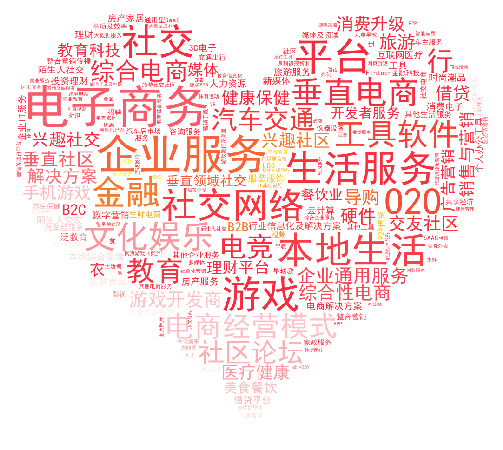

In [108]:
#  统计公司标签，绘制词云图
com_tags = need_data['com_tags']
tags_total = ''
for x in com_tags:
    tags_total += str(x)
tags_list = tags_total.strip('').split('/')
tags = pd.Series(tags_list).value_counts()
print(tags[:30])
fontpath = 'simhei.ttf'
color_mask = imread("heart.jpg") #读取背景图片，
 
wc = WordCloud(font_path = fontpath,          #设置字体
               background_color = "white",    #背景颜色
               max_words = 1000,              #词云显示的最大词数
               max_font_size = 100,           #字体最大值
               min_font_size = 10,            #字体最小值
               random_state = 42,             #随机数
               collocations = False,          #避免重复单词
               mask = color_mask,                 #造型遮盖
               width = 140, height = 80,    #图像宽高，需配合plt.figure(dpi=xx)放缩才有效
               margin = 2                     #字间距
               )
word_frequence = dict(tags)
cl = wc.generate_from_frequencies(word_frequence)
# plt.imshow(cl)
image_colors = ImageColorGenerator(color_mask)
plt.figure(dpi = 140)
plt.imshow(wc.recolor(color_func=image_colors)) # 重新上色
plt.axis('off')